### Przydatne linki do Shapa
- https://shap-lrjball.readthedocs.io/en/docs_update/api.html#plots
- https://github.com/slundberg/shap/blob/master/README.md
- https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
- https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
- https://docs.seldon.io/projects/alibi/en/stable/examples/kernel_shap_wine_intro.html
- https://towardsdatascience.com/demystify-your-ml-model-with-shap-fc191a1cb08a
- https://christophm.github.io/interpretable-ml-book/shap.html#shap-summary-plot
- https://shap.readthedocs.io/en/latest/generated/shap.explainers.Linear.html

In [69]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import pickle
import shap
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_auc_score

shap.initjs()
# all_or_part = 'allFeatures'
all_or_part = 'partFeatures'

In [70]:
mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
     10: 'Music',
     15: 'Pets & Animals',
     17: 'Sports',
     18: 'Short Movies',
     19: 'Travel & Events',
     20: 'Gaming',
     21: 'Videoblogging',
     22: 'People & Blogs',
     23: 'Comedy',
     24: 'Entertainment',
     25: 'News & Politics',
     26: 'Howto & Style',
     27: 'Education',
     28: 'Science & Technology',
     29: 'Nonprofits & Activism',
     30: 'Movies',
     31: 'Anime/Animation',
     32: 'Action/Adventure',
     33: 'Classics',
     34: 'Comedy',
     35: 'Documentary',
     36: 'Drama',
     37: 'Family',
     38: 'Foreign',
     39: 'Horror',
     40: 'Sci-Fi/Fantasy',
     41: 'Thriller',
     42: 'Shorts',
     43: 'Shows',
     44: 'Trailers'
}

### Z outlierami

In [71]:
# df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI.csv')
# scaler = pickle.load(open("../Etap5/scaler.pkl", 'rb'))

# del df['video_id']
# df = df.fillna(-1)
# print(df.shape)
# df[:3]

### Bez outlierów

In [82]:
df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers.csv')
scaler = pickle.load(open("../Etap5/scaler_without_outliers.pkl", 'rb'))

# df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers_ONE_HOT.csv')
# scaler = pickle.load(open("../Etap5/scaler_without_outliers_ONE_HOT.pkl", 'rb'))

del df['video_id']
df = df.fillna(-1)
print(df.shape)
df[:3]

(15445, 54)


,category_id,views,likes,dislikes,comment_count,pub_day_of_the_week,pub_day,pub_hour,dislikes/likes,likes/views,dislikes/views,comment_count/views,n_of_tags,title_length,title_n_of_words,title_capital_letters,title_capital_letters_percent,title_small_letters,title_small_letters_percent,title_punctuation,title_punctuation_percent,title_n_of_emojis,desc_length,desc_n_of_words,desc_capital_letters,desc_capital_letters_percent,desc_small_letters,desc_small_letters_percent,desc_punctuation,desc_punctuation_percent,desc_n_of_urls,desc_n_of_emojis,isFacebook,isTwitter,isInstagram,mean_h,mean_s,mean_v,std_h,std_s,std_v,entropy,avg_texts_coordX,avg_texts_coordY,ocr_sentiment_compound,Sad,Fear,Angry,Happy,Neutral,Surprise,people,faces,trending
0,10,3.156279,6.860132,0.530014,3.044567,-1.478162,0.920080,0.222228,-0.247672,0.239150,-0.061108,-0.022347,-0.981476,0.292420,-0.547389,-0.036612,-0.208537,-0.621686,-1.139866,4.644111,4.195544,-0.097413,-1.003053,-0.898497,-0.593204,1.505147,-1.029948,-1.452863,-0.614837,0.741770,-0.896669,-0.243586,0,0,0,-0.605053,-1.482737,0.972724,-0.219746,-1.423649,0.201933,-0.070243,-1.193143,-1.434435,-0.115615,-0.441187,-0.289289,-0.403271,-0.556994,-0.480048,-0.116932,0.939693,-0.781259,0
1,10,2.701422,7.622910,0.180755,4.367196,0.151210,-1.659686,0.222228,-0.253289,0.490361,-0.062387,-0.022341,2.076977,-1.566546,-1.388068,-0.748343,-0.067582,-1.470444,-1.144482,-0.637835,0.191015,-0.097413,-0.925557,-0.926032,-0.642138,-0.586878,-0.926245,0.074061,-0.730161,2.640549,-0.356408,-0.243586,1,0,1,0.299640,-1.045710,0.476901,0.229982,-0.763544,-0.607451,-0.143248,-1.193143,-1.434435,-0.115615,-0.441187,-0.289289,-0.403271,-0.556994,1.142347,-0.116932,-0.452174,-0.246892,0
2,10,-0.178126,-0.392521,-0.443310,-0.437885,0.694334,-0.487065,-1.438592,-0.213505,-0.507029,-0.062269,-0.022353,-0.498563,0.744601,-0.547389,-0.273855,-0.519735,0.945252,0.522113,3.059527,2.185463,-0.097413,-0.910796,-0.806716,-0.560581,0.417990,-0.915134,-0.030460,-0.730161,-0.403498,-0.761604,0.673798,0,0,0,1.204014,2.172123,0.680729,-0.566376,1.549637,0.235831,0.531390,1.614983,0.332041,1.507315,-0.441187,-0.289289,-0.403271,-0.556994,-0.480048,-0.116932,-0.591361,-0.781259,0


### Dzielenie zbioru

In [83]:
from sklearn.model_selection import train_test_split
# for col in df.columns:
#     temp = df[col].isna()
#     print(f"{col}:, {temp.any()} {temp.sum()}")

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,~df.columns.isin(['trending'])],
#                                                     df.loc[:,columns_to_use],
                                                    df['trending'], 
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=df['category_id']
                                                   )

print(f'X_train: ', X_train.shape)
print(f'y_train: ', y_train.shape)
print(f'X_test: ', X_test.shape)
print(f'y_test: ', y_test.shape)

# Do Shapa
sample_test_set = shap.sample(pd.concat([X_test,y_test],axis=1), 8000)
sample_train_set = shap.sample(X_train, 150) 

columns_not_to_standarize = [
    'video_id', 'category_id', 'trending',
    'isFacebook', 'isTwitter', 'isInstagram'
]

sample_test_set_not_standarized = sample_test_set.copy()
sample_test_set_not_standarized.loc[:, sample_test_set_not_standarized.columns.difference(columns_not_to_standarize)] = scaler.inverse_transform(sample_test_set_not_standarized.loc[:, sample_test_set_not_standarized.columns.difference(columns_not_to_standarize)].values)
sample_test_set_not_standarized[:3]

X_train:  (10811, 53)
y_train:  (10811,)
X_test:  (4634, 53)
y_test:  (4634,)


,category_id,views,likes,dislikes,comment_count,pub_day_of_the_week,pub_day,pub_hour,dislikes/likes,likes/views,dislikes/views,comment_count/views,n_of_tags,title_length,title_n_of_words,title_capital_letters,title_capital_letters_percent,title_small_letters,title_small_letters_percent,title_punctuation,title_punctuation_percent,title_n_of_emojis,desc_length,desc_n_of_words,desc_capital_letters,desc_capital_letters_percent,desc_small_letters,desc_small_letters_percent,desc_punctuation,desc_punctuation_percent,desc_n_of_urls,desc_n_of_emojis,isFacebook,isTwitter,isInstagram,mean_h,mean_s,mean_v,std_h,std_s,std_v,entropy,avg_texts_coordX,avg_texts_coordY,ocr_sentiment_compound,Sad,Fear,Angry,Happy,Neutral,Surprise,people,faces,trending
11925,28,165223.0,2452.0,265.0,1.0,2.0,9.0,6.0,0.108075,0.014841,0.001604,0.000006,30.0,47.0,7.0,6.0,0.127660,27.0,0.574468,5.0,0.106383,1.734723e-17,776.0,123.0,65.0,0.083763,525.0,0.676546,18.0,0.048969,4.0,5.551115e-17,0,0,0,0.228885,0.124931,0.580314,0.305953,0.216951,0.420357,5.926161,109.833333,190.833333,6.938894e-18,5.551115e-17,1.387779e-17,0.0,0.0,0.0,0.0,89.0,0.0,1
768,24,7187.0,72.0,1.0,1.0,4.0,6.0,4.0,0.013889,0.010018,0.000139,0.000139,0.0,24.0,4.0,14.0,0.583333,1.0,0.041667,1.0,0.041667,1.734723e-17,17.0,3.0,2.0,0.117647,0.0,0.000000,1.0,0.058824,0.0,5.551115e-17,0,0,0,0.211116,0.121069,0.415276,0.191660,0.217380,0.418833,5.292400,217.000000,106.000000,6.938894e-18,5.551115e-17,1.387779e-17,0.0,1.0,0.0,0.0,4.0,1.0,0
4931,25,209951.0,1513.0,68.0,223.0,3.0,25.0,13.0,0.044944,0.007206,0.000324,0.001062,27.0,98.0,17.0,22.0,0.224490,56.0,0.571429,2.0,0.020408,1.734723e-17,1277.0,172.0,179.0,0.140172,827.0,0.647612,30.0,0.060298,8.0,5.551115e-17,0,0,0,0.446859,0.350695,0.583564,0.346788,0.325867,0.391406,6.720005,76.000000,289.000000,6.938894e-18,5.551115e-17,1.387779e-17,0.0,0.0,1.0,0.0,1.0,1.0,0


In [84]:
columns_to_use = [
    'category_id',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'pub_day_of_the_week',
 'pub_day',
 'pub_hour',
 'dislikes/likes',
 'likes/views',
 'dislikes/views',
 'comment_count/views',
 'n_of_tags',
 'title_length',
 'title_n_of_words',
 'title_capital_letters',
 'title_capital_letters_percent',
 'title_small_letters',
 'title_small_letters_percent',
 'title_punctuation',
 'title_punctuation_percent',
 'title_n_of_emojis',
 'desc_length',
 'desc_n_of_words',
 'desc_capital_letters',
 'desc_capital_letters_percent',
 'desc_small_letters',
 'desc_small_letters_percent',
 'desc_punctuation',
 'desc_punctuation_percent',
 'desc_n_of_urls',
 'desc_n_of_emojis',
 'isFacebook',
 'isTwitter',
 'isInstagram',
 'mean_h',
 'mean_s',
 'mean_v',
 'std_h',
 'std_s',
 'std_v',
 'entropy',
 'avg_texts_coordX',
 'avg_texts_coordY',
 'ocr_sentiment_compound',
 'Sad',
 'Fear',
 'Angry',
 'Happy',
 'Neutral',
 'Surprise',
 'people',
 'faces',
 'trending'
]

In [85]:
## Wybranie kolumn
X_train = X_train.loc[:,columns_to_use[:-1]]
X_test = X_test.loc[:,columns_to_use[:-1]]
sample_test_set_not_standarized = sample_test_set_not_standarized.loc[:,columns_to_use]
sample_train_set = sample_train_set.loc[:,columns_to_use[:-1]]
sample_test_set = sample_test_set.loc[:,columns_to_use]


print(f'X_train: ', X_train.shape)
print(f'y_train: ', y_train.shape)
print(f'sample_test_set_not_standarized: ', sample_test_set_not_standarized.shape)
print(f'sample_train_set: ', sample_train_set.shape)
print(f'sample_test_set: ', sample_test_set.shape)

X_train:  (10811, 53)
y_train:  (10811,)
sample_test_set_not_standarized:  (4634, 54)
sample_train_set:  (150, 53)
sample_test_set:  (4634, 54)


### Uczenie

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

parameters = {
    'LogisticRegression': [
        {
            'clf': (LogisticRegression(n_jobs=-1),),
            'clf__max_iter': [100, 500, 1000],
            'clf__solver': ['liblinear', 'lbfgs'],
            'clf__C': [0.1, 1.0, 10.0]
        }
    ],
    'RandomForestClassifier': [
        {
            'clf': (RandomForestClassifier(n_jobs=-1),),
            'clf__n_estimators': [10, 100],
            'clf__criterion': ['entropy', 'gini'],
            'clf__max_depth': [None, 5, 10]
        }
    ],
    'SVC': [
        {
            'clf': (SVC(),),
            'clf__C': [0.1, 1.0, 10.0],
            'clf__kernel': ['linear', 'rbf'],
        }
    ]
}

pipeline = Pipeline([
    ('clf', LogisticRegression()),
])

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
best_each_classifier = {}
for classifier_name, params in parameters.items():
    grid_search = GridSearchCV(estimator=pipeline, 
                               param_grid=params, 
                               scoring=scoring,
                               refit='Accuracy',
                               n_jobs=-1)

    clf = grid_search.fit(X_train, y_train)
    
    best_index = clf.best_index_
    best_each_classifier[classifier_name] = {
        'mean_accuracy': clf.cv_results_['mean_test_Accuracy'][best_index],
        'mean_AUC': clf.cv_results_['mean_test_AUC'][best_index],
        'std_accuracy': clf.cv_results_['std_test_Accuracy'][best_index],
        'std_AUC': clf.cv_results_['std_test_AUC'][best_index],
        'estimator': clf.best_estimator_,
    }
    
pickle.dump(best_each_classifier, open(f'./results_stratified_{all_or_part}.pkl', 'wb'))
# pickle.dump(best_each_classifier, open('./results_ONE_HOT.pkl', 'wb'))

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.


In [76]:
best_each_classifier = pickle.load(open(f'./results_stratified_{all_or_part}.pkl', 'rb'))
# best_each_classifier = pickle.load(open('./results_ONE_HOT.pkl', 'rb'))

In [45]:
def test_estimator(estimator, X_test, y_test):

    y_pred = estimator.predict(X_test)
    print("Accuracy test: ", accuracy_score(y_test, y_pred))
    print("AUC test: ", roc_auc_score(y_test, y_pred))

    plot_confusion_matrix(estimator, X_test, y_test)

In [9]:
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from pathlib import Path

def save_dependency_plots(shap_values, clf_name, sample_test_set_not_standarized):
    columns = sample_test_set_not_standarized.columns
    for i, col in enumerate(columns):
    #     ax = plt.subplot(n_rows, n_cols, i+1)
        shap.dependence_plot(col, shap_values[1], sample_test_set_not_standarized, show=False)

        col = col.replace('/', '-')
        path = Path(f"./Shap_plots/{clf_name}/")
        path.mkdir(parents=True, exist_ok=True)

        plt.savefig(str(path) + f"/dependency_{col}.png")
        plt.close()

## LogisticRegression - bez standaryzacji

### Dzielenie zbioru

In [11]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers_NOT_standarized.csv')

del df['video_id']
df = df.fillna(-1)
print(df.shape)

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,~df.columns.isin(['trending'])],
#                                                     df.loc[:,columns_to_use],
                                                    df['trending'], 
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=df['category_id']
                                                   )

## Wybranie kolumn
X_train = X_train.loc[:,columns_to_use[:-1]]
X_test = X_test.loc[:,columns_to_use[:-1]]
sample_test_set_not_standarized = sample_test_set_not_standarized.loc[:,columns_to_use]
sample_train_set = sample_train_set.loc[:,columns_to_use[:-1]]
sample_test_set = sample_test_set.loc[:,columns_to_use]


print(f'X_train: ', X_train.shape)
print(f'y_train: ', y_train.shape)
print(f'X_test: ', X_test.shape)
print(f'y_test: ', y_test.shape)

(15445, 54)
X_train:  (10811, 53)
y_train:  (10811,)
X_test:  (4634, 53)
y_test:  (4634,)


### Nauka

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

parameters = {
    'LogisticRegressionNotStandarized': [
        {
            'clf': (LogisticRegression(n_jobs=-1),),
            'clf__max_iter': [100, 500, 1000],
            'clf__solver': ['liblinear', 'lbfgs'],
            'clf__C': [0.1, 1.0, 10.0]
        }
    ],
}

pipeline = Pipeline([
    ('clf', LogisticRegression()),
])

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
# best_each_classifier = {}
for classifier_name, params in parameters.items():
    grid_search = GridSearchCV(estimator=pipeline, 
                               param_grid=params, 
                               scoring=scoring,
                               refit='Accuracy',
                               n_jobs=-1)

    clf = grid_search.fit(X_train, y_train)
    
    best_index = clf.best_index_
    best_each_classifier[classifier_name] = {
        'mean_accuracy': clf.cv_results_['mean_test_Accuracy'][best_index],
        'mean_AUC': clf.cv_results_['mean_test_AUC'][best_index],
        'std_accuracy': clf.cv_results_['std_test_Accuracy'][best_index],
        'std_AUC': clf.cv_results_['std_test_AUC'][best_index],
        'estimator': clf.best_estimator_,
    }
    
pickle.dump(best_each_classifier, open('./results_stratified_allFeatures.pkl', 'wb'))


TRAIN
Accuracy mean: LogisticRegression(C=10.0, n_jobs=-1, solver='liblinear')
Accuracy mean: 0.629636862154398
Accuracy std: 0.008417678364039066
AUC mean: 0.6820581804169656
AUC std: 0.013468971235971305
TEST
Accuracy test:  0.5384117393180837
AUC test:  0.5363513867085296


,coef
desc_punctuation_percent,62.949003
desc_small_letters_percent,1.567071
mean_h,1.435046
isTwitter,1.230582
std_v,1.191986
title_n_of_emojis,1.115722
desc_n_of_urls,1.113771
entropy,1.059296
Sad,1.055572
Happy,1.023196


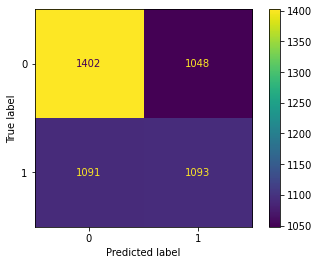

In [46]:
# Interpretacja LR - https://towardsdatascience.com/black-box-models-are-actually-more-explainable-than-a-logistic-regression-f263c22795d

print("TRAIN")
print(f"Accuracy mean: { best_each_classifier['LogisticRegression']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['LogisticRegression']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['LogisticRegression']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['LogisticRegression']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['LogisticRegression']['std_AUC']}")

print("TEST")
estimator = best_each_classifier['LogisticRegressionNotStandarized']['estimator']['clf']
test_estimator(estimator, X_test, y_test)

log_odds_scaled = np.exp(estimator.coef_[0])

pd.DataFrame(log_odds_scaled, 
             X_test.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

### LogisticRegression

TRAIN
Accuracy mean: LogisticRegression(C=10.0, n_jobs=-1, solver='liblinear')
Accuracy mean: 0.629636862154398
Accuracy std: 0.008417678364039066
AUC mean: 0.6820581804169656
AUC std: 0.013468971235971305
TEST
Accuracy test:  0.6422097539922313
AUC test:  0.6405298273155416


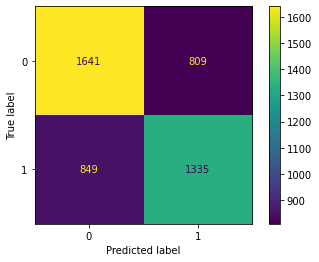

In [47]:
print("TRAIN")
print(f"Accuracy mean: { best_each_classifier['LogisticRegression']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['LogisticRegression']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['LogisticRegression']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['LogisticRegression']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['LogisticRegression']['std_AUC']}")

estimator = best_each_classifier['LogisticRegression']['estimator']['clf']
print("TEST")
test_estimator(estimator, X_test, y_test)

#### SHAP

In [17]:
# df_temp = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers_catNames.csv')
# del df_temp['video_id']
# category_map = gen_category_map(df_temp)
# category_map

In [18]:
# %pip install alibi[shap]
# %pip install alibi[ray] 

In [19]:
# groups = list(range(0, 52))
# groups = [[x] for x in groups]
# groups = groups + [list(range(52, 67))]
# # groups

In [20]:
# category_map = {52: ['Autos & Vehicles',
#   'Comedy',
#   'Education',
#   'Entertainment',
#   'Film & Animation',
#   'Gaming',
#   'Howto & Style',
#   'Music',
#   'News & Politics',
#   'Nonprofits & Activism',
#   'People & Blogs',
#   'Pets & Animals',
#   'Science & Technology',
#   'Sports',
#   'Travel & Events']}

In [48]:
# from alibi.explainers import KernelShap
# from alibi.utils.data import gen_category_map



# explainer = shap.Explainer(estimator.predict_proba,
#                                 shap.sample(X_train, 50),
# #                                 data=X_train,                         
#                                 feature_names=list(X_train.columns))


# shap_values = explainer(sample_test_set) 
# shap.summary_plot(shap_values.data, sample_test_set, X_test.columns)

estimator = best_each_classifier['LogisticRegression']['estimator']['clf']
explainer_LR = shap.KernelExplainer(model=estimator.predict_proba,
                                data=sample_train_set,
#                                 data=X_train,                         
                                feature_names=list(X_train.columns))


shap_values_LR = explainer_LR.shap_values(sample_test_set.iloc[:, :-1])
pickle.dump(explainer_LR, open('./Shap_plots/LogisticRegression_partFeatures/explainer_LR_stratified_partFeatures.pkl', 'wb'))
pickle.dump(shap_values_LR, open('./Shap_plots/LogisticRegression_partFeatures/shap_values_LR_stratified_partFeatures.pkl', 'wb'))

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/4634 [00:00<?, ?it/s]

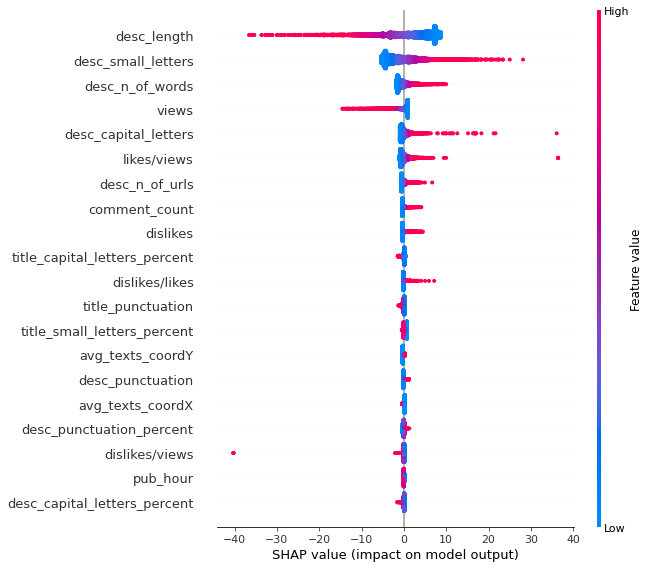

In [63]:
#Explainer

# masker = shap.maskers.Independent(data = X_train)
# explainer_LR2 = shap.Explainer(estimator, masker=masker)

# shap_values_LR2 = explainer_LR2.shap_values(sample_test_set.iloc[:, :-1])
# shap.summary_plot(shap_values_LR2, sample_test_set.iloc[:, :-1], X_test.columns)

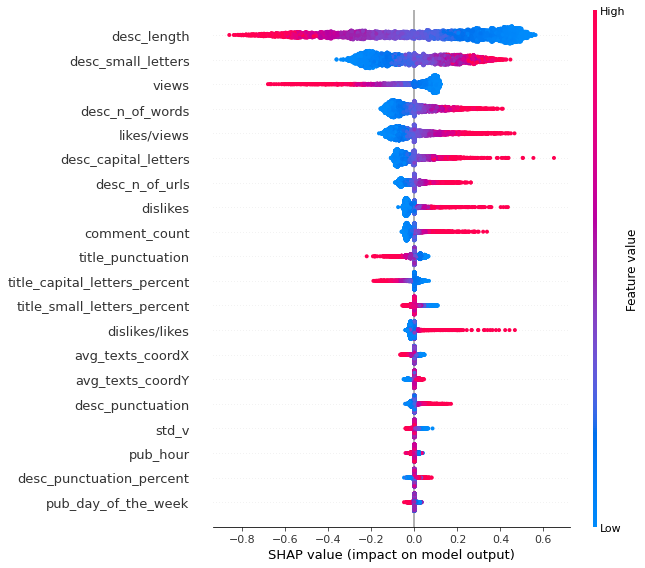

In [22]:
#KernelExplainer
class_id = 1
### Here, all the values on the left represent the observations that shift the predicted value in the negative direction 
### while the points on the right contribute to shifting the prediction in a positive direction. 
shap.summary_plot(shap_values_LR[class_id], sample_test_set.iloc[:, :-1], X_test.columns)

In [110]:
class_id = 1
sample_id = 10

shap.force_plot(
    explainer_LR.expected_value[class_id],
    shap_values_LR[class_id][sample_id,:],
    sample_test_set_not_standarized.iloc[sample_id:sample_id+1, :-1],
    X_test.columns,
)

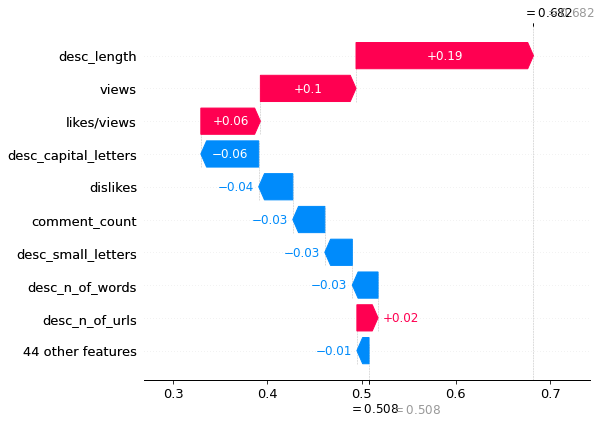

In [25]:
shap.plots._waterfall.waterfall_legacy(explainer_LR.expected_value[class_id], 
                                       shap_values_LR[class_id][sample_id], 
                                       feature_names=X_test.columns)

In [104]:
shap.force_plot(
    explainer_LR.expected_value[class_id],
    shap_values_LR[class_id],
    sample_test_set_not_standarized.iloc[:, :-1],
)

In [49]:
save_dependency_plots(shap_values=shap_values_LR,
                      clf_name='LogisticRegression_partFeatures',
                      sample_test_set_not_standarized=sample_test_set_not_standarized.iloc[:, :-1])     

#### One-hot

In [9]:
# best_each_classifier = pickle.load(open('./results_ONE_HOT.pkl', 'rb'))

# print(f"Accuracy mean: { best_each_classifier['LogisticRegression']['estimator']['clf']}")
# print(f"Accuracy mean: {best_each_classifier['LogisticRegression']['mean_accuracy']}")
# print(f"Accuracy std: {best_each_classifier['LogisticRegression']['std_accuracy']}")
# print(f"AUC mean: {best_each_classifier['LogisticRegression']['mean_AUC']}")
# print(f"AUC std: {best_each_classifier['LogisticRegression']['std_AUC']}")

# estimator = best_each_classifier['LogisticRegression']['estimator']['clf']

# log_odds = np.exp(estimator.coef_[0])
# pd.DataFrame(log_odds, 
#              X_test.columns, 
#              columns=['coef'])\
#             .sort_values(by='coef', ascending=False)


# # Przykład mamy 4.678 razy większą szansę na bycie w klasie 1 niż w klasie 0 za każdy jednostkowy wzrost wartości likes/views

Accuracy mean: LogisticRegression(C=10.0, n_jobs=-1)
Accuracy mean: 0.7491451768730089
Accuracy std: 0.005263984341797739
AUC mean: 0.8246183255309267
AUC std: 0.00822824322644977


,coef
desc_small_letters,70.441581
likes/views,5.143172
desc_n_of_words,4.353290
desc_capital_letters,3.437197
desc_n_of_urls,1.903111
...,...
comment_count/views,0.533414
category_Nonprofits & Activism,0.460787
dislikes/views,0.251632
views,0.164176


### RandomForestClassifier

Accuracy mean: RandomForestClassifier(criterion='entropy', n_jobs=-1)
Accuracy mean: 0.6916101809808645
Accuracy std: 0.009662023256920655
AUC mean: 0.7685200555376879
AUC std: 0.012421135603061163
TEST
Accuracy test:  0.7075960293482952
AUC test:  0.7076360544217688


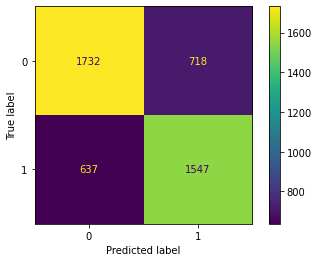

In [78]:
from sklearn.tree import export_graphviz
from graphviz import Source
import graphviz

print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['RandomForestClassifier']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['RandomForestClassifier']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['RandomForestClassifier']['std_AUC']}")

# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
estimator = best_each_classifier['RandomForestClassifier']['estimator']['clf']
print("TEST")
test_estimator(estimator, X_test, y_test)

# Save png
# exp_graph = export_graphviz(estimator, out_file=None, 
#                 feature_names = X_test.columns,
#                 class_names = ['0', '1'],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)
# graph = Source(exp_graph)
# graph.format = 'png'
# graph.render(f'dtree_render_{all_or_part}')

#### SHAP

In [79]:
# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
estimator = best_each_classifier['RandomForestClassifier']['estimator']['clf']

explainer_RFC = shap.TreeExplainer(model=estimator,
                                data=sample_train_set,
#                                 data=X_train,                         
                                feature_names=list(X_train.columns))


shap_values_RFC = explainer_RFC.shap_values(sample_test_set.iloc[:, :-1], check_additivity=False)
pickle.dump(explainer_RFC, open(f'./Shap_plots/RFC_{all_or_part}/explainer_RFC_stratified_{all_or_part}.pkl', 'wb'))
pickle.dump(shap_values_RFC, open(f'./Shap_plots/RFC_{all_or_part}/shap_values_RFC_stratified_{all_or_part}.pkl', 'wb'))
class_id = 1

100%|===================| 9267/9268 [12:31<00:00]        

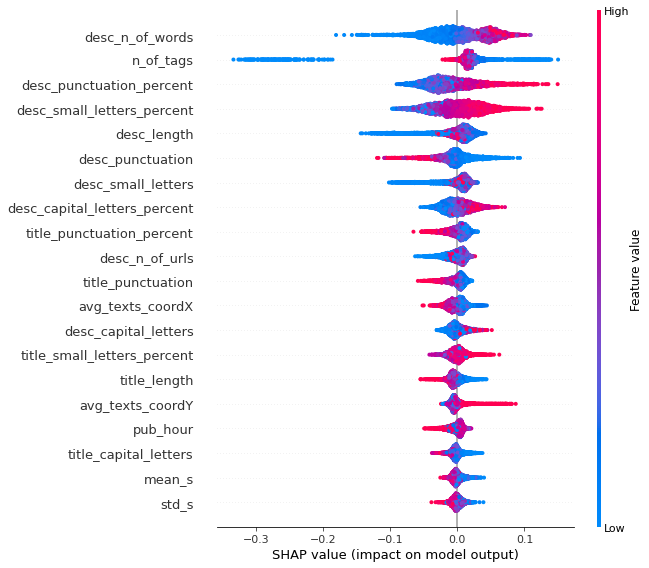

In [80]:
shap.summary_plot(shap_values_RFC[class_id], sample_test_set.iloc[:, :-1])

In [105]:
sample_id = 10

shap.force_plot(
    explainer_RFC.expected_value[class_id],
    shap_values_RFC[class_id][sample_id,:],
    sample_test_set_not_standarized.iloc[sample_id:sample_id+1, :-1],
    X_test.columns,
)

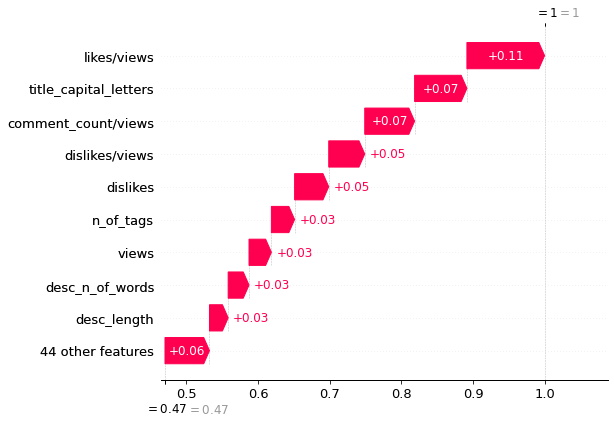

In [35]:
shap.plots._waterfall.waterfall_legacy(explainer_RFC.expected_value[class_id], 
                                       shap_values_RFC[class_id][sample_id], 
                                       feature_names=X_test.columns)

In [106]:
shap.force_plot(
    explainer_RFC.expected_value[class_id],
    shap_values_RFC[class_id],
    sample_test_set_not_standarized.iloc[:, :-1],
)

In [101]:
all_or_part = 'alLFeatures'

In [102]:
shap_values_RFC = pickle.load(open(f'./Shap_plots/RFC_{all_or_part}/shap_values_RFC_stratified_{all_or_part}.pkl', 'rb'))

In [103]:
save_dependency_plots(shap_values=shap_values_RFC,
                      clf_name=f'RFC_{all_or_part}',
                      sample_test_set_not_standarized=sample_test_set_not_standarized.iloc[:, :-1])     

#### One Hot

In [10]:
from sklearn.tree import export_graphviz
from graphviz import Source
import graphviz

print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['RandomForestClassifier']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['RandomForestClassifier']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['RandomForestClassifier']['std_AUC']}")

# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
pickle.dump(best_each_classifier, open('./results_NOT_standarized.pkl', 'wb'))
estimator = best_each_classifier['RandomForestClassifier']['estimator']['clf'].estimators_[5]


# Save png
exp_graph = export_graphviz(estimator, out_file=None, 
                feature_names = X_test.columns,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph = Source(exp_graph)
graph.format = 'png'
graph.render('dtree_render_ONE_HOT')

Accuracy mean: RandomForestClassifier(criterion='entropy', n_jobs=-1)
Accuracy mean: 0.8072339741245734
Accuracy std: 0.009057116090450274
AUC mean: 0.8920535474894301
AUC std: 0.006571917933013941


'dtree_render_ONE_HOT.png'

### SVC

In [ ]:
import seaborn as sns
import shap

print(f"Accuracy mean: {best_each_classifier['SVC']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['SVC']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['SVC']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['SVC']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['SVC']['std_AUC']}")

estimator = best_each_classifier['SVC']['estimator']['clf']
print("TEST")
test_estimator(estimator, X_test, y_test)

explainer_SVC = shap.KernelExplainer(estimator.decision_function, 
                                 data=sample_train_set[:300],
                                feature_names=list(X_train.columns))

shap_values_SVC = explainer_SVC.shap_values(sample_test_set[:300]) 
# pickle.dump(shap_values_SVC, open('./Shap_plots/SVC/shap_values_SVC.pkl', 'wb'))

In [47]:
import seaborn as sns
import shap

print(f"Accuracy mean: {best_each_classifier['SVC']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['SVC']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['SVC']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['SVC']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['SVC']['std_AUC']}")

estimator = best_each_classifier['SVC']['estimator']['clf']

explainer_SVC = shap.KernelExplainer(estimator.predict_proba, 
                                 data=sample_train_set[:3],
                                feature_names=list(X_train.columns),
                                    output_names=['klasa 0', 'klasa 1'])

shap_values_SVC = explainer_SVC.shap_values(sample_test_set[:20]) 
# pickle.dump(shap_values_SVC, open('./Shap_plots/SVC/shap_values_SVC.pkl', 'wb'))

Accuracy mean: SVC(C=10.0, probability=True)
Accuracy mean: 0.7619097229795703
Accuracy std: 0.005924790578815786
AUC mean: 0.8419401436324785
AUC std: 0.006949211565227907


  0%|          | 0/20 [00:00<?, ?it/s]

In [20]:
# shap_values_SVC = pickle.load(open('./Shap_plots/SVC/shap_values_SVC.pkl', 'rb'))

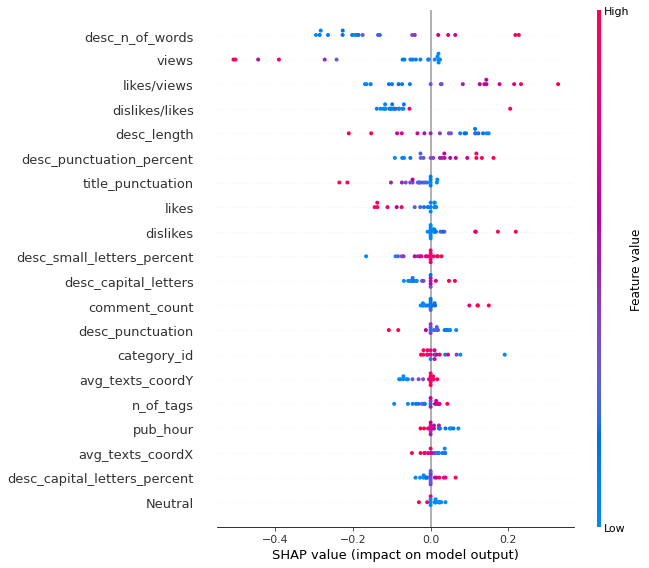

In [56]:
class_id = 1
shap.summary_plot(shap_values_SVC[class_id], sample_test_set[:20], class_names=estimator.classes_)

In [109]:
sample_id = 10

shap.force_plot(
    explainer_SVC.expected_value[class_id],
    shap_values_SVC[sample_id,:],
    sample_test_set_not_standarized[sample_id:sample_id+1],
    X_test.columns,
)

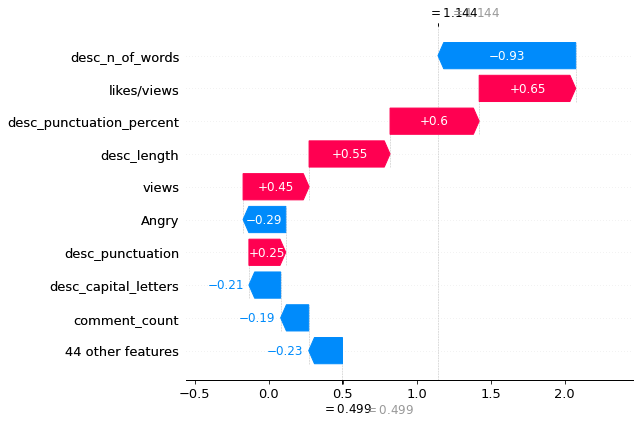

In [33]:
shap.plots._waterfall.waterfall_legacy(explainer_SVC.expected_value[class_id], 
                                       shap_values_SVC[sample_id], 
                                       feature_names=X_test.columns)

In [108]:
shap.force_plot(
    explainer_SVC.expected_value[class_id],
    shap_values_SVC,
    sample_test_set_not_standarized,
)

In [40]:
# save_dependency_plots(shap_values=shap_values_SVC,
#                       clf_name='SVC',
#                       sample_test_set_not_standarized=sample_test_set_not_standarized)     